# 25.01.24   
### 군집화 실습

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# k-means clustering

### 데이터 준비
* 테스트 데이터 생성
    * make_blobs()

In [2]:
# 3개의 군집을 가지는 테스트 데이터 생성
from sklearn.datasets import make_blobs
features, targets = make_blobs(n_samples=200, 
                    n_features=2,
                    centers=3,
                    cluster_std=0.8,
                    random_state=0)

print(features.shape, targets.shape)

(200, 2) (200,)


In [3]:
# 생성된 테스트데이터로 DataFrame 만들기
cluster_df = pd.DataFrame(features, columns=['feature1','feature2'])
cluster_df['target'] = targets
cluster_df.head(3)

,feature1,feature2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


In [4]:
# target 데이터의 빈도수
cluster_df['target'].value_counts()

target
0    67
1    67
2    66
Name: count, dtype: int64

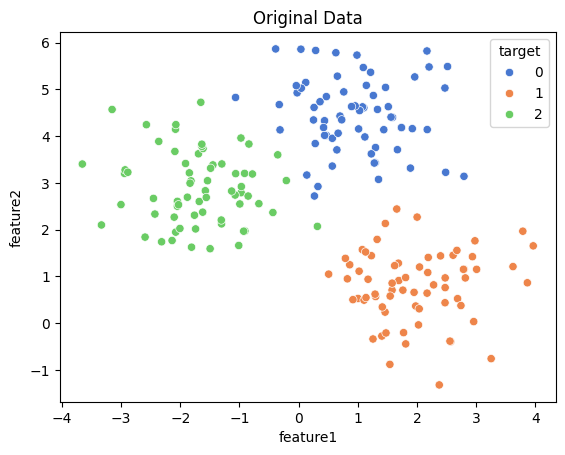

In [5]:
# 데이터 시각화
sns.scatterplot(data=cluster_df, x='feature1', y='feature2', 
                hue='target', palette='muted');
plt.title('Original Data');

### 군집화

In [6]:
# 클러스터링 객체 생성
from sklearn.cluster import KMeans 
# km = KMeans(n_clusters=3, random_state=0)
km = KMeans(n_clusters=3, random_state=0)

# # 학습 및 클러스터링 결과 예측
# # 테스트 따로 없이 군집 데이터 그대로 넘겨줌
# km.fit(features)
# pred = km.predict(features)
# # 올인원
kmeans_cluster = km.fit_predict(features)


In [7]:
# 데이터프레임에 군집과 결과인 kmeans_cluster 컬럼 추가
cluster_df['kmeans_cluster'] = kmeans_cluster

cluster_df.head()

,feature1,feature2,target,kmeans_cluster
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,2
2,1.100228,4.606317,0,2
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,2


In [8]:
# 클러스터의 중심
km.cluster_centers_

array([[ 1.95763312,  0.81041752],
       [-1.70636483,  2.92759224],
       [ 0.990103  ,  4.44666506]])

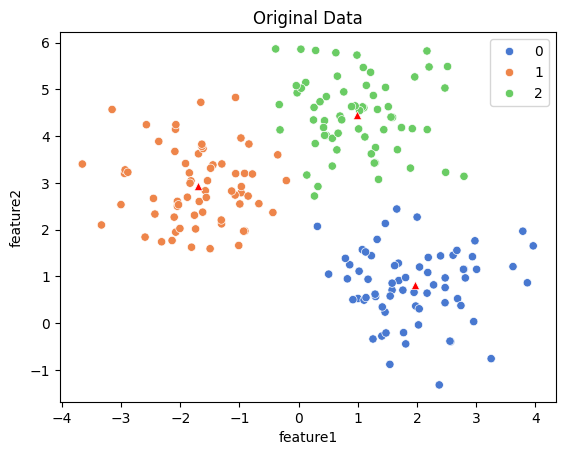

In [9]:
# 군집화 결과 시각화
sns.scatterplot(data=cluster_df, x='feature1', y='feature2', 
                hue='kmeans_cluster', palette='muted')
plt.title('Original Data')

# 개별 군집의 중심 좌표
sns.scatterplot(x=km.cluster_centers_[:,0], 
                y=km.cluster_centers_[:,1],
                color='r',
                marker='^')

pass

### elbow 방법

In [10]:
# inertia_: 각 데이터 포인트와 그 데이터가 속한 군집의 중심점 사이의 거리 제곱합 
inerita = []
for i in range(2,7):
    km = KMeans(i)
    km.fit(features)
    inerita.append(km.inertia_)

print(inerita)



[548.0904569461313, 240.0078759459446, 209.1941694371127, 186.39925118357505, 154.91060394590696]


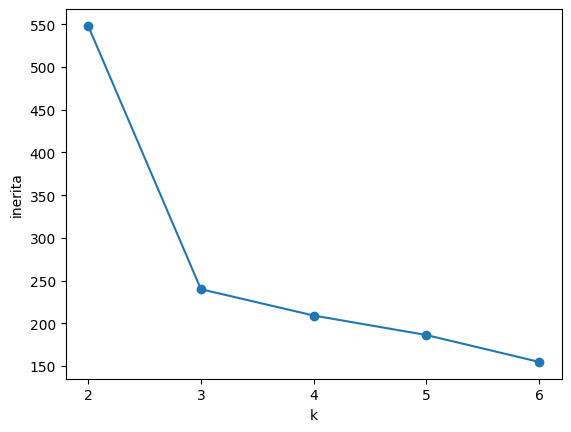

In [11]:
# inertia 시각화
plt.plot(range(2,7), inerita, marker='o')
plt.xticks(range(2,7))
plt.xlabel('k')
plt.ylabel('inerita')
plt.show()
pass

### 실루엣 분석

In [12]:
# 개별 실루엣 계수 (군집 평가 지표)
# cluster_df.loc[cluster_df['silhouette'] < 0]
from sklearn.metrics import silhouette_samples
cluster_df['silhouette'] = silhouette_samples(features, kmeans_cluster)
cluster_df.head()

,feature1,feature2,target,kmeans_cluster,silhouette
0,-1.692427,3.622025,2,1,0.598109
1,0.697940,4.428867,0,2,0.658958
2,1.100228,4.606317,0,2,0.704928
3,-1.448724,3.384245,2,1,0.609202
4,1.214861,5.364896,0,2,0.658057


In [13]:
# 다른 군집에 클러스터가 할당된 데이터가 있는지 확인
cluster_df.loc[cluster_df['silhouette'] < 0]


,feature1,feature2,target,kmeans_cluster,silhouette


In [14]:
# 평균 실루엣 계수
from sklearn.metrics import silhouette_score
silhouette_score(features, kmeans_cluster)

np.float64(0.5764726251866076)

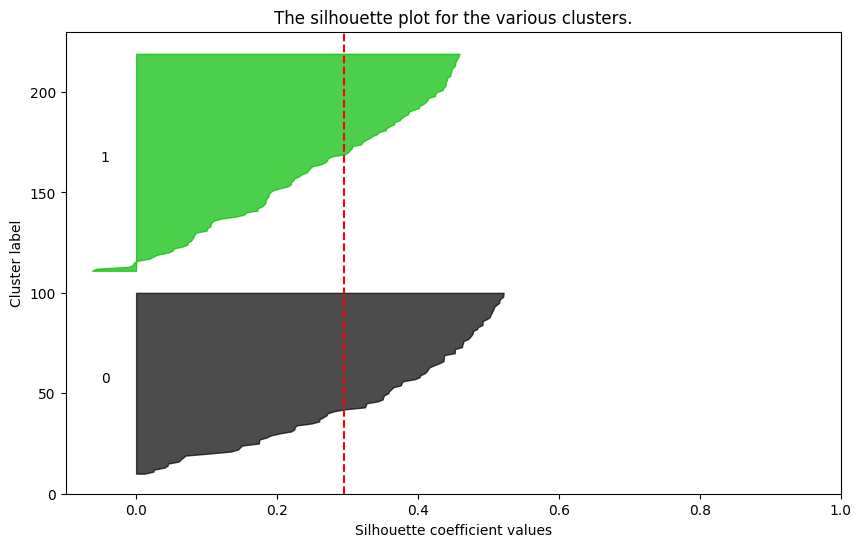

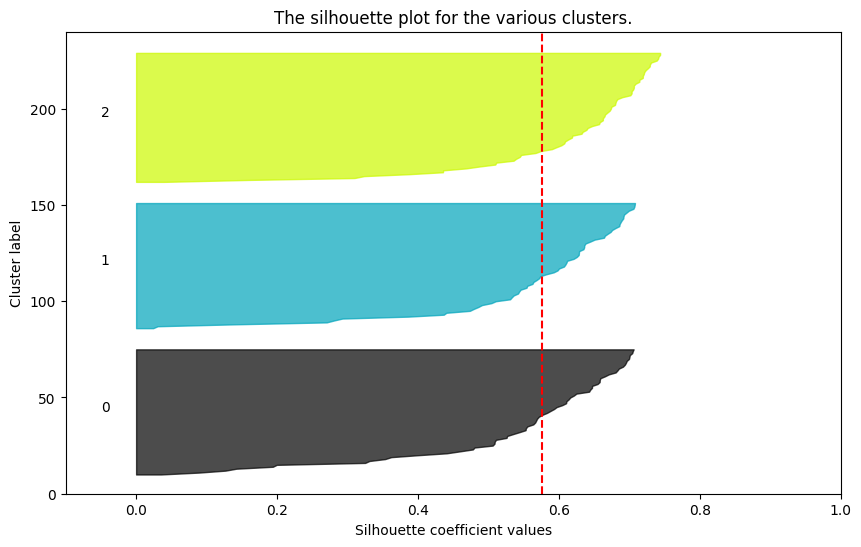

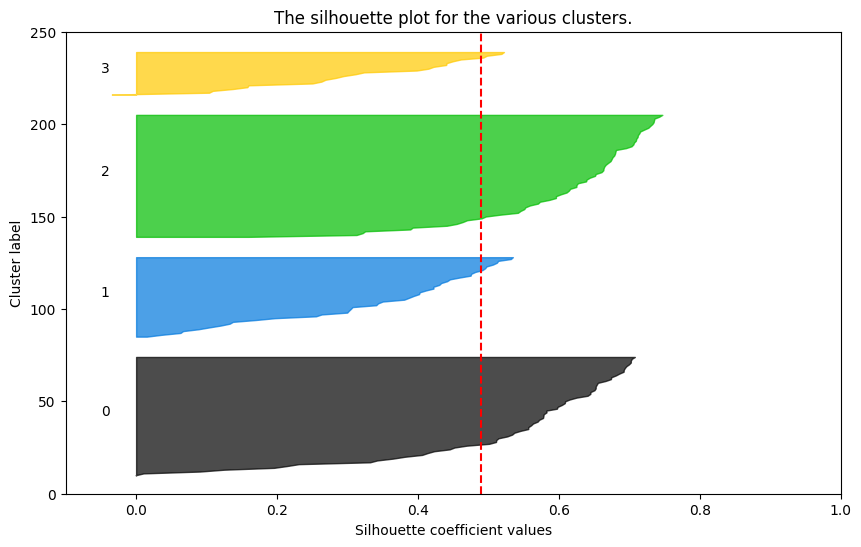

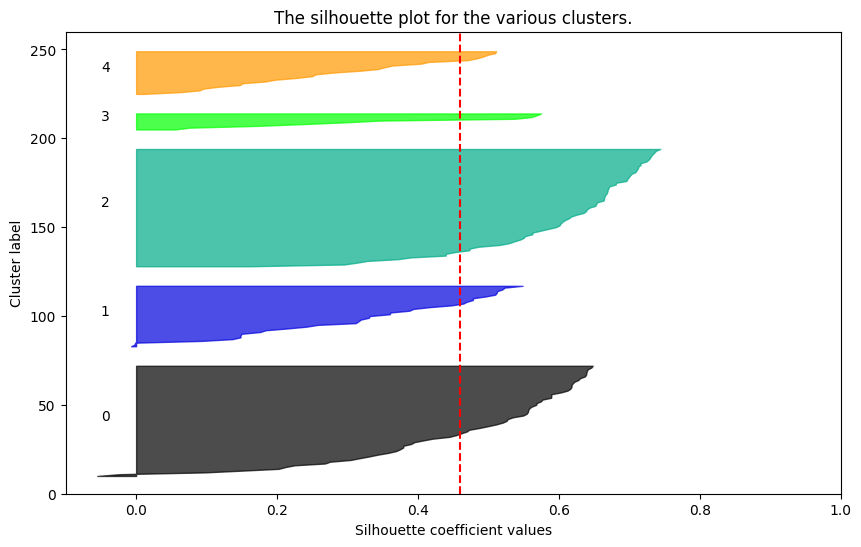

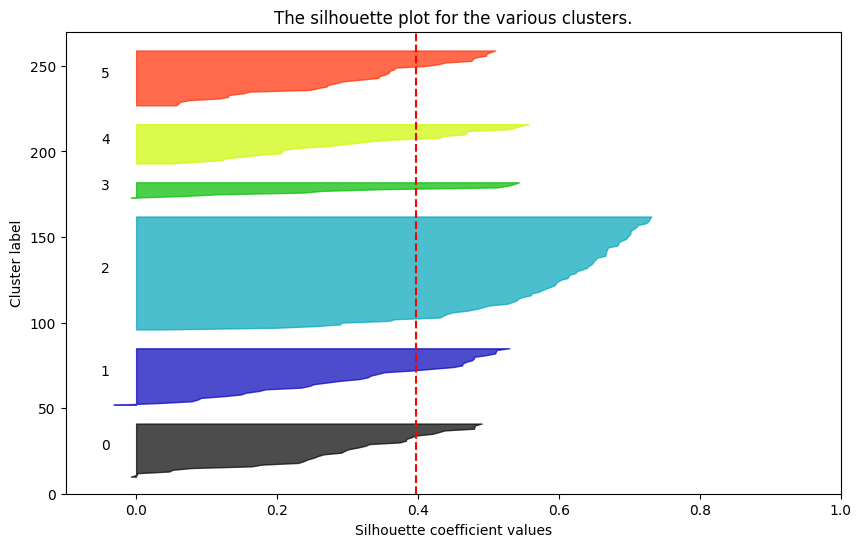

In [15]:
# 최적의 실루엣 찾기
# from silhouette_analysis import silhouette_plot
# import silhouette_analysis as s 
from data import silhouette_analysis as s 

# plt.figure(figsize=(5,5))
for k in range(2,7):
    s.silhouette_plot(features, k)

    pass



# DBSCAN

### 데이터 준비

In [16]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000,
                    shuffle=True,
                    noise=0.05,
                    random_state=0,
                    factor=0.5)

df = pd.DataFrame(X, columns=['feature1', 'feature2'])
df['target'] = y

df.head()

,feature1,feature2,target
0,0.519781,-0.015981,1
1,-0.057719,-0.420279,1
2,-0.805155,-0.662227,0
3,0.316549,0.312730,1
4,-0.304804,0.407563,1


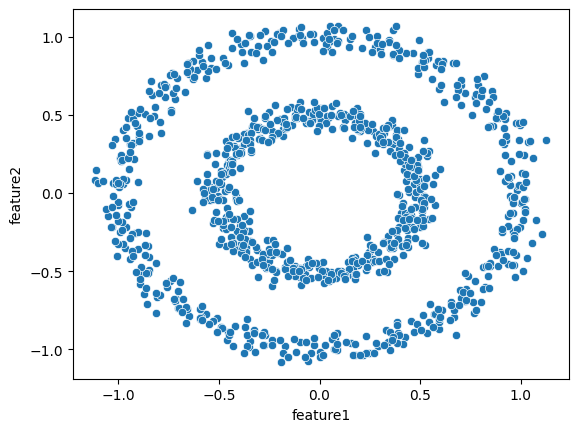

In [17]:
sns.scatterplot(data=df, x='feature1', y='feature2');

### k-means clustering

In [18]:
from sklearn.cluster import KMeans

# 클래스로 객체 생성
km = KMeans(n_clusters=2, random_state=0)

# 클러스터링
df['kmeans'] = km.fit_predict(X)
df.head()

,feature1,feature2,target,kmeans
0,0.519781,-0.015981,1,0
1,-0.057719,-0.420279,1,0
2,-0.805155,-0.662227,0,1
3,0.316549,0.312730,1,0
4,-0.304804,0.407563,1,1


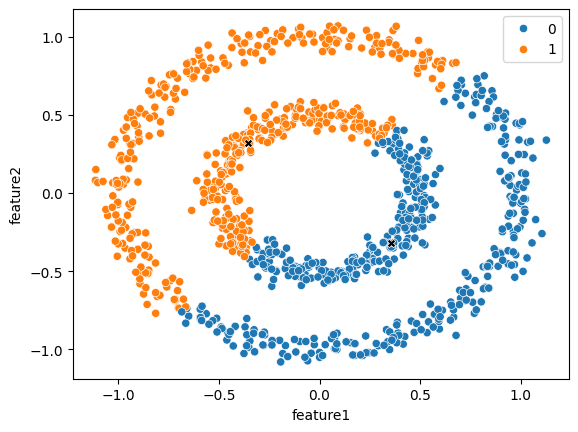

In [19]:
sns.scatterplot(data=df, x='feature1', y='feature2', hue='kmeans');
sns.scatterplot(x=km.cluster_centers_[:,0], 
                y=km.cluster_centers_[:,1],
                marker='X', color='k');

### DBSCAN

In [20]:
from sklearn.cluster import DBSCAN
dbscans = DBSCAN(eps=0.2, min_samples=10)
df['dbscan'] = dbscans.fit_predict(X)
df.head()

,feature1,feature2,target,kmeans,dbscan
0,0.519781,-0.015981,1,0,0
1,-0.057719,-0.420279,1,0,0
2,-0.805155,-0.662227,0,1,1
3,0.316549,0.312730,1,0,0
4,-0.304804,0.407563,1,1,0


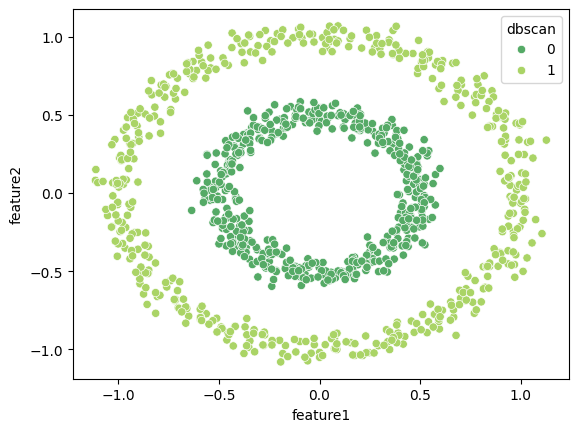

In [21]:

# palette = palette.

sns.scatterplot(data=df, x='feature1', y='feature2', hue='dbscan', palette='summer')

pass